In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import cv2


In [2]:
model=torch.hub.load('ultralytics/yolov5','yolov5s')

c:\Users\91789\ML Projects\Drowsiness Detection\env\lib\site-packages\torch\hub.py:294: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\91789/.cache\torch\hub\master.zip
YOLOv5  2024-4-8 Python-3.9.18 torch-2.2.2+cu118 CPU

100%|██████████| 14.1M/14.1M [00:47<00:00, 310kB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding Auto

In [15]:
img='https://cdn.vox-cdn.com/thumbor/SLAqByY-1IyAnbvJpxug9I0JZNY=/232x0:2999x2075/920x613/filters:focal(232x0:2999x2075):format(webp)/cdn.vox-cdn.com/uploads/chorus_image/image/44219366/72499026.0.0.jpg'

In [16]:
results=model(img)
results.print()

image 1/1: 613x920 21 cars, 2 trucks
Speed: 2035.1ms pre-process, 911.6ms inference, 59.1ms NMS per image at shape (1, 3, 448, 640)


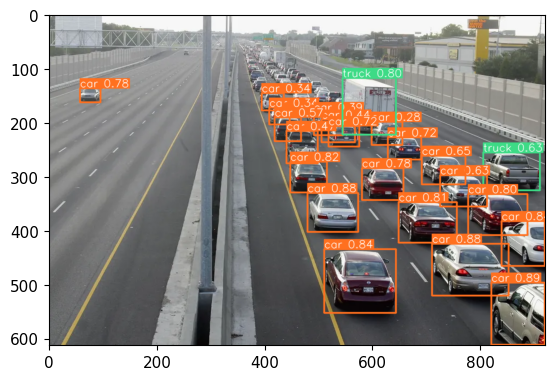

In [17]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))


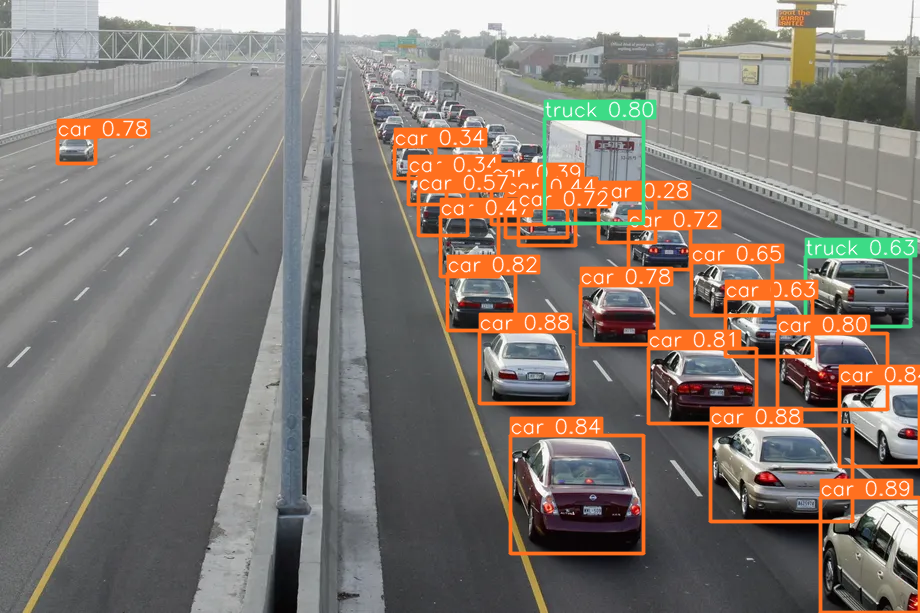

In [18]:
results.show()

In [23]:
cap=cv2.VideoCapture(0)
while cap.isOpened():
    ret,frame=cap.read()

    results=model(frame)

    cv2.imshow("YOLO",np.squeeze(results.render()))

    if cv2.waitKey(10) & 0xFF==ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


In [24]:
import uuid   ##unique identifier
import os
import time

In [26]:
IMAGES_PATH=os.path.join('data','images')
labels=['awake','drowsy']
number_imgs=20 



In [29]:
cap=cv2.VideoCapture(0)
for label in labels:
    print("Collecting images for {}".format(label))
    time.sleep(5)

    for img_num  in range(number_imgs):
        print("collecting images for {}, image number {}".format(label,img_num))

        ret,frame=cap.read()

        imgname=os.path.join(IMAGES_PATH,label+'.'+str(uuid.uuid1())+'.jpg')
        cv2.imwrite(imgname,frame)
        cv2.imshow('Image Collection',frame)
        time.sleep(2)

    if cv2.waitKey(10) & 0xFF==ord('q'):
        break

cap.release()
cv2.destroyAllWindows() 
         

collecting images for awake, image number 0
collecting images for awake, image number 1
collecting images for awake, image number 2
collecting images for awake, image number 3
collecting images for awake, image number 4
collecting images for awake, image number 5
collecting images for awake, image number 6
collecting images for awake, image number 7
collecting images for awake, image number 8
collecting images for awake, image number 9
collecting images for awake, image number 10
collecting images for awake, image number 11
collecting images for awake, image number 12
collecting images for awake, image number 13
collecting images for awake, image number 14
collecting images for awake, image number 15
collecting images for awake, image number 16
collecting images for awake, image number 17
collecting images for awake, image number 18
collecting images for awake, image number 19
collecting images for drowsy, image number 0
collecting images for drowsy, image number 1
collecting images fo

In [105]:
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 100 --data dataset.yaml --weights yolov5s.pt --workers 2


train: weights=yolov5s.pt, cfg=, data=dataset.yaml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=100, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data\hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest, ndjson_console=False, ndjson_file=False
github: up to date with https://github.com/ultralytics/yolov5 
fatal: cannot change to 'C:\Users\91789\ML': No such file or directory
YOLOv5  2024-4-8 Python-3.9.18 torch-2.2.2+cu118 CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1,

In [110]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp9/weights/last.pt', force_reload=True)


Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\91789/.cache\torch\hub\master.zip
YOLOv5  2024-4-12 Python-3.9.18 torch-2.2.2+cu118 CPU

Fusing layers... 
Model summary: 157 layers, 7055974 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


In [111]:
img=os.path.join('data','images','awake.b655007a-f6b8-11ee-96b7-d41b81469bcc.jpg')


In [112]:
results=model(img)

In [113]:
results.print()

image 1/1: 480x640 1 awake
Speed: 14.2ms pre-process, 216.3ms inference, 19.0ms NMS per image at shape (1, 3, 480, 640)


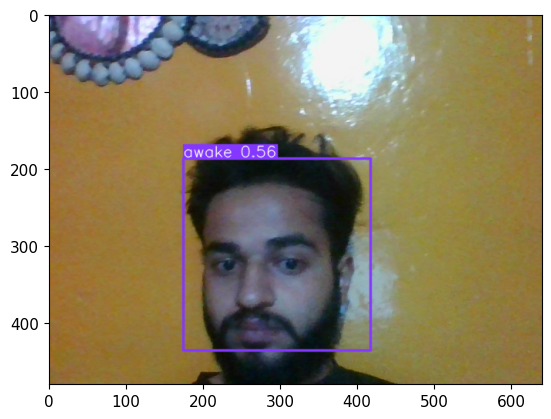

In [114]:
plt.imshow(np.squeeze(results.render()))

In [118]:
cap=cv2.VideoCapture(0)

while cap.isOpened():
    ret,frame=cap.read()

    results=model(frame)

    cv2.imshow("YOLO",np.squeeze(results.render()))

    if cv2.waitKey(10) & 0xFF==ord('q'):
        break

cap.release()
cv2.destroyAllWindows() 
